### Estructura del notebook

1. Introducción de librerias a utilizar y presentación inicial de los conjuntos de datos.
2. Respuesta a las preguntas 1 a 3. 
3. Analisis exploratorio del conjunto de datos Occupancy Detection (después de responder las primeras cuatro preguntas se llegó a la conclusión de que el conjunto de datos que podía garantizar generalización era el de Occupancy Detection por lo tanto es el enfoque del notebook y el unico que va a ser utilizado para continuar con las demás preguntas). 
4. Respuesta a las preguntas 4 a 6.
5. Aplicación del mismo problema usando Regresión logistica y Arboles de decisión. 

### Introducción

In [16]:
import pandas as pd
import numpy as np
import sklearn

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron
from scipy import stats
from sklearn.metrics import accuracy_score
from sklearn import datasets

# Primer dataset - Banknote authentication Data Set 
df1 = pd.read_csv('data_banknote_authentication.txt', header=None, names = ['variance', 'skewness', 'curtosis', 'entropy', 
                                                                            'class'])

# Segundo dataset - Occupancy Detection Data Set
df2_train = pd.read_csv('datatraining.txt', parse_dates = ['date'])
df2_validation = pd.read_csv('datatest.txt', parse_dates = ['date'])
df2_test = pd.read_csv('datatest2.txt', parse_dates = ['date']) 

In [2]:
df1.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
df2_train.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
1,2015-02-04 17:51:00,23.18,27.2720,426.0,721.25,0.004793,1
2,2015-02-04 17:51:59,23.15,27.2675,429.5,714.00,0.004783,1
3,2015-02-04 17:53:00,23.15,27.2450,426.0,713.50,0.004779,1
4,2015-02-04 17:54:00,23.15,27.2000,426.0,708.25,0.004772,1
5,2015-02-04 17:55:00,23.10,27.2000,426.0,704.50,0.004757,1


### Analisis exploratorio del conjunto de datos Banknote authentication

Para este conjunto de datos no se ve la necesidad de normalizar columnas y tampoco hay problemas de valores faltantes por lo tanto solo se va a organizar y dividir en set de entrenamiento y prueba (no se agrega validación debido a la cantidad limitada de registros)

In [4]:
X1 = df1.drop(['class'], axis=1).to_numpy()
y1 = df1['class'].to_numpy()

Separamos las variables predictoras (X) y de respuesta (Y) de cada conjunto de datos

In [5]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.33, random_state=42)

### Analisis exploratorio del conjunto de datos Occupancy Detection

In [17]:
df2_train.info()
df2_train.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 8143 entries, 1 to 8143
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           8143 non-null   datetime64[ns]
 1   Temperature    8143 non-null   float64       
 2   Humidity       8143 non-null   float64       
 3   Light          8143 non-null   float64       
 4   CO2            8143 non-null   float64       
 5   HumidityRatio  8143 non-null   float64       
 6   Occupancy      8143 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 508.9+ KB


,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,20.619084,25.731507,119.519375,606.546243,0.003863,0.212330
std,1.016916,5.531211,194.755805,314.320877,0.000852,0.408982
min,19.000000,16.745000,0.000000,412.750000,0.002674,0.000000
25%,19.700000,20.200000,0.000000,439.000000,0.003078,0.000000
50%,20.390000,26.222500,0.000000,453.500000,0.003801,0.000000
75%,21.390000,30.533333,256.375000,638.833333,0.004352,0.000000
max,23.180000,39.117500,1546.333333,2028.500000,0.006476,1.000000


In [18]:
# Organización del dataset
# El set de datos 2 ya viene dividido en el conjunto de datos de entrenamiento, validacion y prueba

df2_train.columns = df2_train.columns.str.lower()
df2_validation.columns = df2_validation.columns.str.lower()
df2_test.columns = df2_test.columns.str.lower()

Dado que tenemos valores bajos de de humedad relativa y valores altos como la luz y el CO2 debemos normalizar los datos para simplificar el proceso de aprendizaje.

In [19]:
scaler = MinMaxScaler()
columns = ['temperature', 'humidity', 'light', 'co2', 'humidityratio']

# Se entrena el algoritmo usando el conjunto de datos de entrenamiento
scaler.fit(np.array(df2_train[columns]))

# Se aplica el algoritmoa todas los conjuntos de datos
df2_validation[columns] = scaler.transform(np.array(df2_validation[columns]))
df2_test[columns] = scaler.transform(np.array(df2_test[columns]))
df2_train[columns] = scaler.transform(np.array(df2_train[columns]))

df2_train.describe()

,temperature,humidity,light,co2,humidityratio,occupancy
count,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000,8143.000000
mean,0.387341,0.401676,0.077292,0.119942,0.312576,0.212330
std,0.243281,0.247233,0.125947,0.194536,0.224186,0.408982
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.167464,0.154431,0.000000,0.016246,0.106304,0.000000
50%,0.332536,0.423623,0.000000,0.025220,0.296338,0.000000
75%,0.571770,0.616307,0.165795,0.139925,0.441308,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


El tiempo lo vamos a manejar en horas y en días de semana

In [20]:
# Aplicación conjunto de datos de entrenamiento
#df2_train['week_day'] = df2_train['date'].dt.day_name()
df2_train['week_day'] = df2_train['date'].dt.weekday 
df2_train['hour'] = df2_train['date'].dt.hour

# Aplicación a los demás conjuntos de datos
#df2_validation['week_day'] = df2_validation['date'].dt.day_name()
df2_validation['week_day'] = df2_validation['date'].dt.weekday
df2_validation['hour'] = df2_validation['date'].dt.hour

#df2_test['week_day'] = df2_test['date'].dt.day_name()
df2_test['week_day'] = df2_test['date'].dt.weekday
df2_test['hour'] = df2_test['date'].dt.hour 

#NOTA: Lunes es el día 0 y Domingo es el 6

In [21]:
df2_train.head() 

,date,temperature,humidity,light,co2,humidityratio,occupancy,week_day,hour
1,2015-02-04 17:51:00,1.000000,0.470533,0.275490,0.190933,0.557318,1,2,17
2,2015-02-04 17:51:59,0.992823,0.470332,0.277754,0.186446,0.554807,1,2,17
3,2015-02-04 17:53:00,0.992823,0.469326,0.275490,0.186136,0.553761,1,2,17
4,2015-02-04 17:54:00,0.992823,0.467315,0.275490,0.182887,0.551669,1,2,17
5,2015-02-04 17:55:00,0.980861,0.467315,0.275490,0.180566,0.547851,1,2,17


In [22]:
df2_validation.head()

,date,temperature,humidity,light,co2,humidityratio,occupancy,week_day,hour
140,2015-02-02 14:19:00,1.124402,0.425835,0.378444,0.208231,0.549737,1,0,14
141,2015-02-02 14:19:59,1.128708,0.426640,0.374046,0.215163,0.551972,1,0,14
142,2015-02-02 14:21:00,1.131579,0.423958,0.370338,0.220898,0.549997,1,0,14
143,2015-02-02 14:22:00,1.129785,0.419265,0.319304,0.224045,0.544374,1,0,14
144,2015-02-02 14:23:00,1.137321,0.422617,0.315973,0.226675,0.550376,1,0,14


In [23]:
df2_test.head()

,date,temperature,humidity,light,co2,humidityratio,occupancy,week_day,hour
1,2015-02-11 14:48:00,0.660287,0.643126,0.282820,0.381814,0.617295,1,2,14
2,2015-02-11 14:49:00,0.667464,0.637166,0.282820,0.363454,0.614025,1,2,14
3,2015-02-11 14:50:00,0.662081,0.642642,0.280664,0.365774,0.617441,1,2,14
4,2015-02-11 14:51:00,0.662081,0.642642,0.283897,0.369333,0.617441,1,2,14
5,2015-02-11 14:51:59,0.667464,0.643126,0.282820,0.366961,0.619737,1,2,14


In [13]:
df2_train_ = df2_train.copy()

In [24]:
# Separate majority and minority classes
df2_train_mayority = df2_train[df2_train['occupancy'] == 0]
df2_train_minority = df2_train[df2_train['occupancy'] == 1] #minority_class

In [25]:
len(df2_train_minority)

1729

In [26]:
from sklearn.utils import resample
df2_train_mayority_downsampled = resample(df2_train_mayority, 
                                 replace = False,     # sample without replacement
                                 n_samples = 1729)    # to match minority class

In [27]:
# Combine minority class with downsampled majority class
new_df2_train = pd.concat([df2_train_mayority_downsampled, df2_train_minority])

Text(0.5, 1.0, 'Distribución de los estados de ocupación')

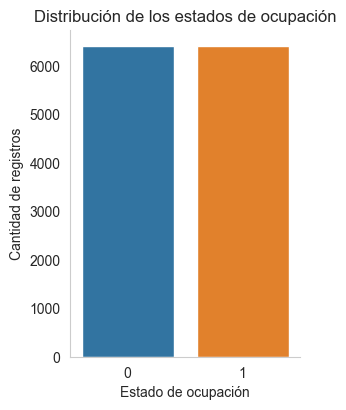

In [49]:
sns.set_style('whitegrid', {'axes.grid' : False})
ax = sns.catplot(x = 'occupancy', data=new_df2_train, kind = 'count', height = 4, aspect=0.8)
ax.set_axis_labels('Estado de ocupación', 'Cantidad de registros')
plt.title('Distribución de los estados de ocupación', fontdict = {'fontsize':12})

Separamos las variables predictoras (X) y de respuesta (Y) de cada conjunto de datos

In [46]:
len(df2_train_mayority)

6414

In [48]:

df2_train_minority_upsampled = resample(df2_train_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=6414) 
new_df2_train = pd.concat([df2_train_minority_upsampled, df2_train_mayority])

In [50]:
X2_train = new_df2_train.drop(['occupancy', 'date'], axis=1).to_numpy()
y2_train = new_df2_train['occupancy'].to_numpy()
X2_test = df2_test.drop(['occupancy', 'date'], axis=1).to_numpy()
y2_test = df2_test['occupancy'].to_numpy()
X2_validation = df2_validation.drop(['occupancy', 'date'], axis=1).to_numpy()
y2_validation = df2_validation['occupancy'].to_numpy()

In [51]:
new_df2_train.head()

,date,temperature,humidity,light,co2,humidityratio,occupancy,week_day,hour
1139,2015-02-05 12:49:00,0.861244,0.436026,0.345980,0.392130,0.478772,1,3,12
6837,2015-02-09 11:47:00,0.571770,0.739971,0.304915,0.637320,0.678087,1,0,11
1259,2015-02-05 14:49:00,0.787081,0.518270,0.349537,0.394708,0.537695,1,3,14
1098,2015-02-05 12:08:00,0.765550,0.455917,0.316232,0.421321,0.469673,1,3,12
6717,2015-02-09 09:47:00,0.358852,0.648117,0.284544,0.343494,0.522644,1,0,9


In [52]:
X2_train

array([[ 0.86124402,  0.43602637,  0.34597974, ...,  0.4787717 ,
         3.        , 12.        ],
       [ 0.57177033,  0.73997095,  0.30491485, ...,  0.67808749,
         0.        , 11.        ],
       [ 0.78708134,  0.5182702 ,  0.34953654, ...,  0.53769518,
         3.        , 14.        ],
       ...,
       [ 0.3145933 ,  0.73550117,  0.15003233, ...,  0.58504631,
         1.        ,  8.        ],
       [ 0.3145933 ,  0.74198234,  0.27549041, ...,  0.59071793,
         1.        ,  8.        ],
       [ 0.3245614 ,  0.74444072,  0.27096357, ...,  0.59623712,
         1.        ,  8.        ]])

In [ ]:
X2_train = df2_train.drop(['occupancy', 'date'], axis=1).to_numpy()
y2_train = df2_train['occupancy'].to_numpy()
X2_test = df2_test.drop(['occupancy', 'date'], axis=1).to_numpy()
y2_test = df2_test['occupancy'].to_numpy()
X2_validation = df2_validation.drop(['occupancy', 'date'], axis=1).to_numpy()
y2_validation = df2_validation['occupancy'].to_numpy()

In [ ]:
df2_train['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in df2_train['date']]
df2_validation['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in df2_validation['date']]
df2_test['period_of_day'] = [1 if (i.hour >= 7 and i.hour <= 17) else 0 for i in df2_test['date']]

In [ ]:
df2_train['week_day'] = df2_train['date'].dt.weekday 
df2_validation['week_day'] = df2_validation['date'].dt.weekday 
df2_test['week_day'] = df2_test['date'].dt.weekday 

In [ ]:
df2_train.head()

In [ ]:
df2_train[7359:7365]

In [ ]:
X2_train = df2_train.drop(['occupancy', 'date'], axis=1).to_numpy()
y2_train = df2_train['occupancy'].to_numpy()
X2_test = df2_test.drop(['occupancy', 'date'], axis=1).to_numpy()
y2_test = df2_test['occupancy'].to_numpy()
X2_validation = df2_validation.drop(['occupancy', 'date'], axis=1).to_numpy()
y2_validation = df2_validation['occupancy'].to_numpy()

In [ ]:
X2_train

### Preguntas 1 - 3

#### 1. Especificar cual es el problema de aprendizaje de maquina que se esta resolviendo. 

#### 2. Proporcionar un breve resumen de las variables y las etiquetas en las que se está trabajando.

##### Occupancy Detection Data Set
Este conjunto de datos contiene datos experimentales de mediciones de luz, temperatura, humedad y CO2 para detectar la ocupación de una sala de oficina; es importante determinar de forma precisa la ocupación de un edificio/sala/oficina porque se ha estimado que puede ahorra energía en el orden del 30 al 42%.

A continuación se muestran las variables que componen el conjunto de datos: 
- date: Momento en el que se tomó la imagen.
- temperature: Temperatura del cuarto medida en grados Celcius
- Relative Humidity: Humedad relativa la cual es medida en porcentaje.
- Light: Iluminación en lux, es la cantidad de luz que pasa a través de una superficie y es medido Lux.
- Occupancy: Ocupación, 0 ó 1, 0 es el estado NO ocupado y 1 es el estado ocupado.




El CO2 parece tener una lectura máxima matutina justo después de las 11:00.
Otra característica interesante del gráfico es que las curvas de CO2 y humedad muestran un patrón muy similar, especialmente para la humedad
relación y el CO2. Cuando la habitación no está ocupada alrededor de las 13:00
y 13:30, el sensor de luz registra una caída significativa en la luz
medición (luces apagadas), también el CO2, la humedad y la temperatura
los sensores registran una pequeña caída en sus lecturas. Cuando la habitación está
dejado vacío después de las 18:00 todos los sensores muestran una tendencia a la baja, pero
la caída más dramática es la medición de la luz. El día siguiente
alrededor de las 7:30 de la mañana cuando la habitación es ocupada nuevamente por
la primera persona, todas las lecturas de los sensores comienzan a aumentar notablemente.

La determinación precisa de la detección de ocupación en edificios
se ha estimado recientemente que ahorra energía en el orden del 30 al 42%
[1–3]. Las mediciones experimentales informaron que el ahorro de energía
fue del 37% en [4] y entre el 29% y el 80% [5] cuando los datos de ocupación
se utilizó como entrada para los algoritmos de control de HVAC. En la actualidad, con
la asequibilidad de los sensores aumenta y se vuelve más omnipresente, junto con un poder de cómputo asequible para la automatización
hace que la determinación de la ocupación sea un enfoque muy prometedor para reducir el consumo de energía mediante un control adecuado
de HVAC y sistemas de iluminación en edificios. Otras aplicaciones para
la detección de ocupación incluye la seguridad y la determinación de los comportamientos de los ocupantes del edificio. Un sistema que podría detectar con precisión la
La presencia de los ocupantes sin usar una cámara es muy interesante por cuestiones de privacidad.
Esta investigación ha utilizado datos registrados de luz, temperatura,
sensores de humedad y CO2 como un medio para detectar la ocupación y un
cámara digital para establecer la ocupación del terreno para el entrenamiento del modelo de clasificación supervisada. C



date time year-month-day hour:minute:second
Temperature, in Celsius
Relative Humidity, %
Light, in Lux
CO2, in ppm
Humidity Ratio, Derived quantity from temperature and relative humidity, in kgwater-vapor/kg-air
Occupancy, 0 or 1, 0 for not occupied, 1 for occupied status

#### 3a. ¿Son estos conjuntos de datos linealmente separables?

Si un conjunto de datos es linealmente separable existira al menos un hiperplano que separa el conjunto de datos a la clases a la que pertenece, formalmente se debe resolver la siguiente ecuación. 
$$
h(\mathbf{x})=\operatorname{sign}\left(\mathbf{w}^{\mathrm{T}} \mathbf{x}\right).
$$

Para resolverla podemos usar el algoritmo de aprendizaje de perceptrón (perceptron learning algorithm - PLA), el algoritmo tiene como objetivo encontrar un vector que tome la decisión correcta $\mathbf{w}$ que hace que $h\left(\mathbf{x}_n\right)=y_n$ para todo el conjunto de datos de entrenamiento.

El algoritmo encontrará este $\mathbf{w}$ usando un método iterativo simple. Así es como funciona: En la iteración $t$, donde $t=0,1,2, \ldots$, hay un valor actual del vector de peso $\mathbf{w}(t)$, el algoritmo elige un ejemplo (llamemoslo $(\mathbf{ x}(t), y(t))$) que pertene al conjunto de datos $\left(\mathbf{x}_1, y_1\right) \cdots\left(\mathbf{x}_N, y_N\right)$ y que actualmente está mal clasificado y lo usa para actualizar $\mathbf{w}(t)$. Dado que el ejemplo está mal clasificado vamos a tener que $y(t) \neq$ $\operatorname{sign}\left(\mathbf{w}^{\mathrm{T}} \mathbf{x}\right)$. 

Asi la regla para actualizar $\mathbf{w}(t)$ es
$$
\mathbf{w}(t+1)=\mathbf{w}(t)+y(t) \mathbf{x}(t)
$$

Esta regla mueve el hiperplano de separación en la dirección correcta para clasificar $\mathbf{x}(t)$. El algoritmo continúa con más iteraciones hasta que ya no existan ejemplos mal clasificados en el conjunto de datos.

A continuación se muestra la aplicación del algoritmo de aprendizaje de perceptrón

In [53]:
pla1 = Perceptron(tol = 1e-3, random_state = 42)
pla1.fit(X1_train, y1_train)
pla2 = Perceptron(tol = 1e-3, random_state = 42)
pla2.fit(X2_train, y2_train)

print('Calificación PLA primer data set: ', round(pla1.score(X1_train, y1_train)*100, 2))
print('Calificación PLA segundo data set: ', round(pla2.score(X2_train, y2_train)*100, 2))

Calificación PLA primer data set:  98.26
Calificación PLA segundo data set:  98.89


Como podemos ver para ambos casos el algoritmo predice en un 98% las clases a las que pertenece cada uno de los conjuntos de datos, por lo que podemos concluir que efectivamente ambos datasets son linealmente separables. 

#### 3b. ¿Se eligieron los conjuntos de datos al azar?

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'axes.grid' : False})
ax = sns.catplot(x = 'occupancy', data=df2_train, kind = 'count', height = 4, aspect=0.8)
ax.set_axis_labels('Estado de ocupación', 'Cantidad de registros')
plt.title('Distribución de los estados de ocupación', fontdict = {'fontsize':12})

#### 3c. ¿Es el tamaño de la muestra lo suficientemente grande para garantizar generalización?

La generalización es el problema clave en el aprendizaje. Se puede definir el error de generalización como la discrepancia
entre $E_{\text {in }}$ y $E_{\text {out }}$·

El error $E_{\text {out }}$ mide qué tan bien el proceso de entrenamiento ha generalizado a datos que no hemos visto antes, si queremos estimar el valor de $E_{\text {out }}$ usando una muestra de puntos de datos, estos puntos deben ser nuevos puntos que no se hayan usado para entrenamiento. El error $E_{\text {in}}$, por el contrario, se basa en puntos de datos que se han utilizado para el entrenamiento. Mide expresamente el rendimiento del proceso de entrenamiento.

Se puede definir el error de generalización como la discrepancia entre $E_{\text {in }}$ y $E_{\text {out }}$. La Desigualdad de Hoeffding proporciona una manera de caracterizar el error de generalización con un límite probabilístico,

$$
\mathbb{P}\left[\left|E_{\text {in }}(g)-E_{\text {out }}(g)\right|>\epsilon\right] \leq 2 M e^{-2 \epsilon^2 N}
$$

Para cualquier $\epsilon>0$. Esto se puede reformular de la siguiente manera, elegimos un nivel de tolerancia $\delta$, por
ejemplo $\delta=0.05$ y buscamos con probabilidad de al menos $1 -\delta$ que
$$
E_{\text {out }}(g) \leq E_{\mathrm{in}}(g)+\sqrt{\frac{1}{2 N} \ln \frac{2 M}{\delta}} .
$$
donde 

- N: número de muestras del conjunto de entrenamiento
- m: número de muestras del conjunto de prueba

Nos referimos al tipo de desigualdad anterior como un límite de generalización porque limita $E_{\text {out }}$ en términos de $E_{\text {in }}$.
Para ver que la Desigualdad de Hoeffding implica este límite de generalización, reescribimos la ecuación de la siguiente manera: con probabilidad de al menos $1 -\delta$,

$$
\epsilon=\sqrt{\frac{1}{2 N} \ln \frac{2 M}{\delta}}$$

en donde $\left|E_{\text {out }} - E_{\text {in }}\right| \leq \epsilon$ esto implica que $E_{\text {out}} \leq E_{\text {in}}+\epsilon$. 

Sacando N de la ecuación se tiene que, 

$$
\sqrt{\frac{1}{2 N} \ln \frac{2 M}{\delta}} \leq \epsilon \Leftrightarrow N \geq \frac{1}{2 \epsilon^2} \ln \frac{2 M}{\delta}
$$


Para los datasets que tenemos vamos a tomar un nivel de tolerancia $\delta = 0.05$ y $\epsilon = 0.05$

In [54]:
print('muestras conjunto de entrenamiento 1:', len(X1_train))
print('muestras conjunto de prueba 1:', len(X1_test))
print('muestras conjunto de entrenamiento 2:', len(X2_train))
print('muestras conjunto de prueba 2:', len(X2_test))

muestras conjunto de entrenamiento 1: 919
muestras conjunto de prueba 1: 453
muestras conjunto de entrenamiento 2: 12828
muestras conjunto de prueba 2: 9752


In [55]:
M1 = len(X1_test)
M2 = len(X2_test)
epsilon = 0.05
delta = 0.05

N1 = (1/(2*epsilon**2))*np.log((2*M1)/delta)
N2 = (1/(2*epsilon**2))*np.log((2*M2)/delta)
print('muestras necesarias en el conjunto de entrenamiento 1 para garantizar generalización', N1)
print('muestras necesarias en el conjunto de entrenamiento 2 para garantizar generalización', N2)

muestras necesarias en el conjunto de entrenamiento 1 para garantizar generalización 1960.9543159193938
muestras necesarias en el conjunto de entrenamiento 2 para garantizar generalización 2574.8214250550086


De lo anterior notamos que con el tamaño actual del primer conjunto de datos no podemos garantizar generalización con una probabilidad del 95%; sin embargo con el segundo conjunto de datos si lo podemos hacer.

#### 4. Proporcione una explicación de cómo y por qué funciona el código. Puede agregar comentarios y/o explicaciones formales en el notebook.

In [56]:
# svm.py
class SVM:

    def __init__(self, C = 1.0):  # Función de inicialización
        # C = error term

        self.C = C
        self.w = 0
        self.b = 0
        
    # Esta función inicializa la clase SVM con un parámetro C, que representa el término de error. 
    # Además, se inicializan los atributos w y b en cero.
        
    
    def hingeloss(self, w, b, x, y): # Función para calcular la función de perdida 
        # Regularizer term
        reg = 0.5 * (w * w) # Primero calculamos el valor del termino del regularizador (variable reg)

        for i in range(x.shape[0]): # Iteramos sobre el numero de muestras 
            # Optimization term
            opt_term = y[i] * ((np.dot(w, x[i])) + b) # Calculamos el termino a optimizar

            # calculating loss
            loss = reg + self.C * max(0, 1-opt_term) # Finalmente calculamos la función de perdida 
        return loss[0][0]
    
    
    def fit(self, X, Y, batch_size=100, learning_rate=0.001, epochs=1000):
        # Dentro de esta función vamos a correr el algoritmo de gradiente descendente para obtener los 
        # mejores parametros w y b.
        # Esta función busca reducir la perdida en cada iteración y encontrar los parámetros w y b
        
        # Cantidad de parámetros de X
        number_of_features = X.shape[1]

        # Cantidad de muestras en X
        number_of_samples = X.shape[0]

        c = self.C

        # Creamos ids desde 0 hasta el número de muestras de X - 1 
        ids = np.arange(number_of_samples)

        # Mezclamos las muestras aleatoriamente 
        np.random.shuffle(ids) 

        # Construcción de un vector de ceros
        w = np.zeros((1, number_of_features))
        b = 0
        losses = []

        # La logica del algoritmo gradiente descedente
        for i in range(epochs):
            # Calculamos la función de perdida con la función construida arriga hingeloss
            l = self.hingeloss(w, b, X, Y)

            # Unimos todas las perdidas
            losses.append(l)
            
            # Empezando desde cero hasta llegar al numero de myestras con el tamaño de bache como intervalo
            for batch_initial in range(0, number_of_samples, batch_size):
                gradw = 0
                gradb = 0

                for j in range(batch_initial, batch_initial + batch_size):
                    if j < number_of_samples:
                        x = ids[j]
                        ti = Y[x] * (np.dot(w, X[x].T) + b)

                        if ti > 1:
                            gradw += 0
                            gradb += 0
                        else:
                            # Calculamos los gradientes

                            #w.r.t w 
                            gradw += c * Y[x] * X[x]
                            # w.r.t b
                            gradb += c * Y[x]

                # Se actualizan los terminos de pesos y bias 
                w = w - learning_rate * w + learning_rate * gradw
                b = b + learning_rate * gradb
        
        self.w = w
        self.b = b
        
        # Los pesos (w) y el sesgo (b) se actualizan en cada iteración utilizando los gradientes y la tasa de
        # aprendizaje, lo que da como resultado la minimización de la pérdida. Cuando se encuentran los parámetros
        # óptimos, el método simplemente los devuelve junto con las pérdidas.

        return self.w, self.b, losses
    
    def predict(self, X):
        # Con los parametros obtenidos en la función fit calculamos a que clase pertene la muestra
        
        prediction = np.dot(X, self.w[0]) + self.b # w.x + b
        return np.sign(prediction)

In [69]:
class SVM1:

    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None


    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

#### 5. Muestre algunos ejemplos para ilustrar que el método está funcionando correctamente.

Después de obtener los resultados del punto anterior se va a realizar el ejemplo con el segundo dataset Occupancy Detection ya que existe una probabilidad del 95% de que el tamaño del conjunto de datos es suficiente para generalizar. 

#### 6. Proporcionar evidencia cuantitativa para la generalización utilizando el conjunto de datos proporcionado.

A nivel cuantitativo veo que hay generalización si al fijarme en que el accuray obtenido con el conjunto de datos de prueba es similar al que se obtuvo durante entrenamiento, esto porque si el modelo esta generalizando esto significa que para nuevos datos es capaz de predecir de la misma forma como lo hizo con los datos de entrenamiento y que no simplemente se aprendio los datos de memoria, si el modelo se esta aprende de memoria los datos entonces la precisión del modelo con los datos de prueba debe bajar significatemente. 

In [70]:
len(y2_train)

12828

In [71]:
clf = SVM1()
clf.fit(X2_train, y2_train)

In [72]:
prediction1 = clf.predict(X2_validation)
prediction2 = clf.predict(X2_test)
prediction3 = clf.predict(X2_train)

In [62]:
%time
svm = SVM()

w, b, losses = svm.fit(X2_train, y2_train)
prediction1 = svm.predict(X2_validation)
prediction2 = svm.predict(X2_test)

# Valor de perdida
lss = losses.pop()

#print("Loss:", lss)
#print("Prediction:", prediction2)
#print("Accuracies:", accuracy_score(prediction1, y2_validation), accuracy_score(prediction2, y2_test) )
#print("w, b:", [w, b])

CPU times: total: 0 ns
Wall time: 0 ns


TypeError: cannot unpack non-iterable NoneType object

In [74]:
prediction3

array([-1., -1., -1., ..., -1., -1., -1.])

In [75]:
y2_train

array([1, 1, 1, ..., 0, 0, 0], dtype=int64)

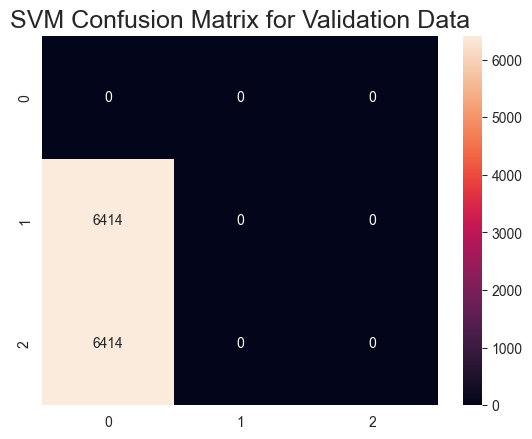

In [73]:
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y2_train, prediction3), annot=True, fmt="d")

In [68]:
print("Accuracies:", accuracy_score(y2_validation, prediction1), accuracy_score(y2_test, prediction2))

Accuracies: 0.0 0.0


In [43]:
from sklearn.metrics import confusion_matrix

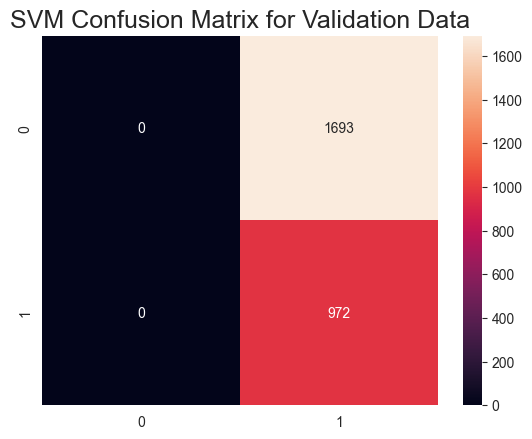

In [44]:
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y2_validation, prediction1), annot=True, fmt="d")

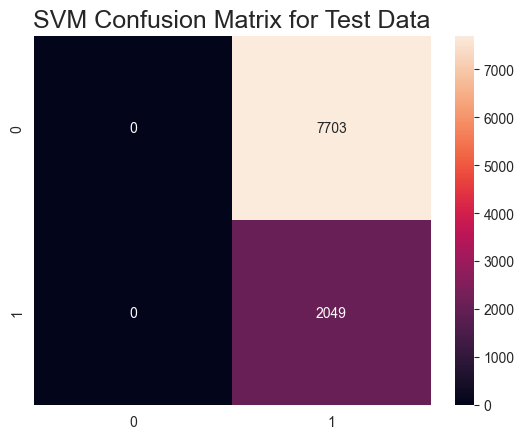

In [45]:
plt.title("SVM Confusion Matrix for Test Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y2_test, prediction2), annot=True, fmt="d")

In [ ]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model.fit(X2_train, y2_train)
print("Accuracy for SVM on validation data: {}%".format(round((svm_model.score(X2_validation, y2_validation)*100),2)))

In [ ]:
y_pred = svm_model.predict(X2_validation)
plt.title("SVM Confusion Matrix for Validation Data", fontdict={'fontsize':18})
ax = sns.heatmap(confusion_matrix(y2_validation, y_pred), annot=True, fmt="d")

# NOTAS ADICIONALES

Revisamos si en el conjunto de datos las clases (estado de ocupación) estan balanceadas

Text(0.5, 1.0, 'Distribución de los estados de ocupación')

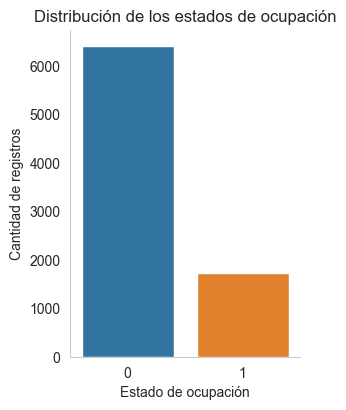

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style('whitegrid', {'axes.grid' : False})
ax = sns.catplot(x = 'occupancy', data=df2_train, kind = 'count', height = 4, aspect=0.8)
ax.set_axis_labels('Estado de ocupación', 'Cantidad de registros')
plt.title('Distribución de los estados de ocupación', fontdict = {'fontsize':12})